# Determining the Ice thickness of Vatnajokull based on H/V spectral ratio

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
root = "D:\MEMOIRE\Ice_thickness"
alt_glacier = '\point_altitude_glacier\point_altitude_glacier.csv'
station = "\lt_nodes_ablation_lambert.csv"
hvsr_fold = "D:\MEMOIRE\Geopsy_res\DATE_7_12"

In [4]:
with open(root+alt_glacier) as file :
    glac_alt = []
    pos = []
    line = 0
    readcsv = csv.reader(file, delimiter=',')
    for row in readcsv :
        if line > 0 :
            glac_alt.append(float(row[-1]))
            pos.append(float(row[3])/1000)
        line += 1
print(len(pos))
print(len(glac_alt))

1430
1430


In [5]:
filepath = root+station
print(filepath)
with open(filepath) as file :
    stt = []
    readcsv = csv.reader(file, delimiter=',')
    i = 0
    line = 0
    for row in readcsv :
        if line > 0 :
            stt.append([row[1]])
            stt[i].extend(row[4:7])
            i += 1
        line += 1
        
def sortThird(val):
    return val[2]
stt.sort(key=sortThird)

node_alt = []
name_station = []
for line in stt :
    node_alt.append(float(line[3]))
    name_station.append(line[0])

print(len(node_alt))

D:\MEMOIRE\Ice_thickness\lt_nodes_ablation_lambert.csv
6


In [6]:
def distance_station(stt) :
    DIST_orign = [0]
    for i in range(1,len(stt)) :
        diff_X = float(stt[i][1]) - float(stt[i-1][1])
        diff_Y = float(stt[i][2]) - float(stt[i-1][2])
        dist = (diff_X**2+diff_Y**2)**(1/2)
        DIST_orign.append((DIST_orign[i-1]*1000+dist)/1000)
    return DIST_orign
DIST = distance_station(stt)
print(len(DIST))
#print(DIST)

6


In [7]:
print(name_station)

['20773', '20781', '20769', '20774', '20739', '20754']


###### La oldest ice : Qu'est-ce que c'est ? partir sur où on la trouve, comment on la trouve et quel est l'intéret.

In [8]:
F0 = []
vs = 1900
H = []

YERRORHIGH = []
YERRORLOW = []
YERROR = []

for nme_stt in name_station :   
    filepath = hvsr_fold+'\SS_'+ nme_stt +'.hv'
    print(filepath)
    line = 0
    with open(filepath) as file :
        readcsv = csv.reader(file, delimiter='\t')
        for row in readcsv :
            line += 1
            if line == 5 :
                #print(row)
                f0 = float(row[1]) #extracting the f0 in the hv file
                #print(row[2])
                F0.append(f0)
                h = vs/(4.0*f0) #calculation of ice thickness
                H.append(h) #save ice thickness in a list
                yhigh = vs/(4.0*(float(row[3]))) #calculate the standart deviation of f0
                ylow = vs/(4.0*(float(row[2])))
                YERRORHIGH.append(h-yhigh)
                YERRORLOW.append(ylow-h)

BED_ALT = np.subtract(node_alt, H)
XERROR = ((vs/4)*np.power(F0, -1))/1000 #Lambda/4 where lambda = Vs/f0
#YERRORHIGH = 10*np.array(YERRORHIGH)
YERROR.append(YERRORLOW)
YERROR.append(YERRORHIGH)
#print(F0)
#print(H)
#print(BED_ALT)
#print(XERROR)
#print(YERROR)

D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20773.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20781.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20769.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20774.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20739.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20754.hv


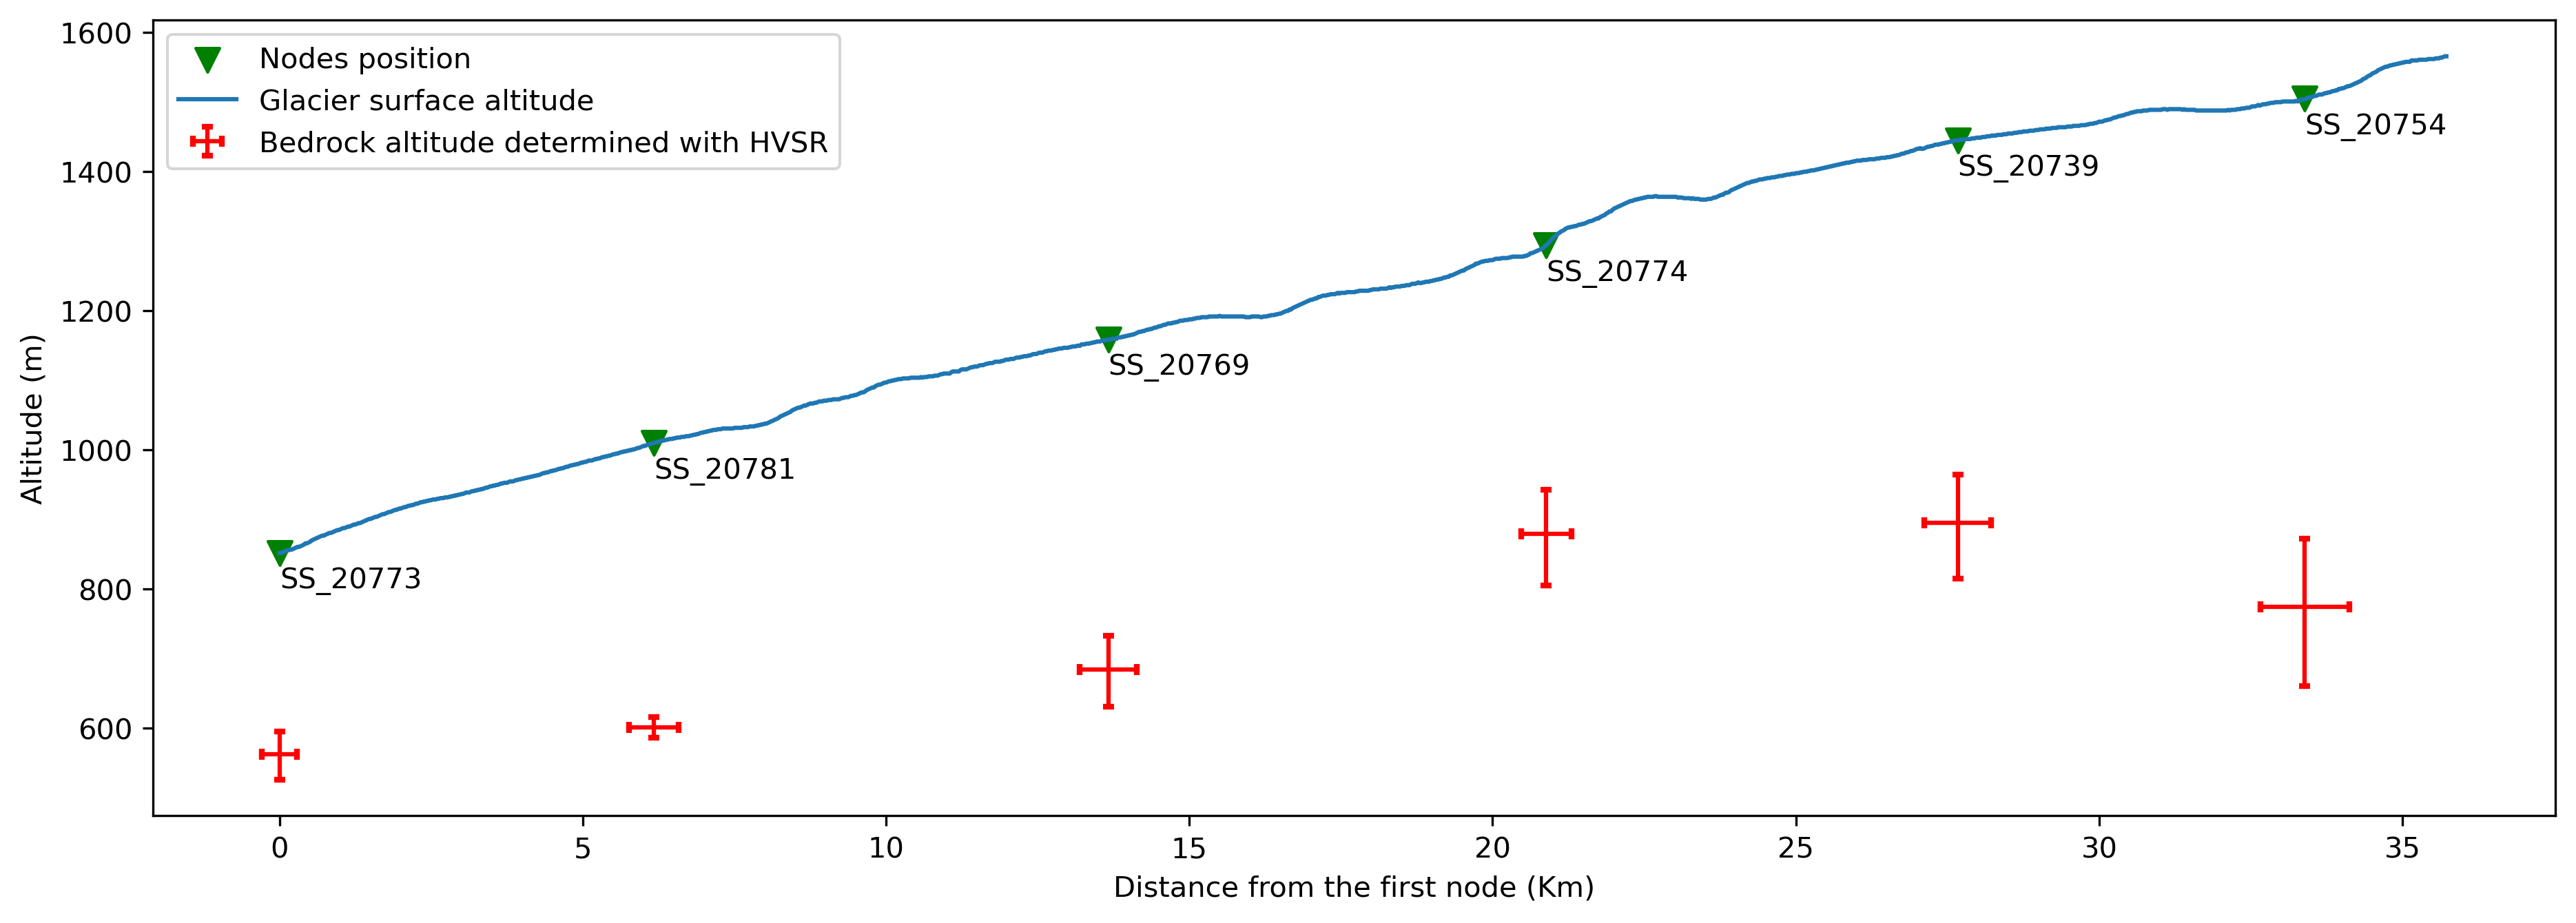

In [9]:
plt.figure(figsize=(15, 5), dpi=300)
plt.scatter(DIST, node_alt, s=70 , c='green', marker='v', label = 'Nodes position')
#plt.scatter(DIST, BED_ALT, s=60, c='red',marker='o')
plt.plot(pos, glac_alt, label = 'Glacier surface altitude')
plt.errorbar(DIST,BED_ALT,xerr = XERROR, yerr = YERROR, linestyle='None', ecolor= 'red', capsize=2, capthick=2, label = 'Bedrock altitude determined with HVSR')
for i in range(len(DIST)) :
    plt.text(DIST[i],node_alt[i]-50,'SS_'+name_station[i])
plt.xlabel('Distance from the first node (Km)')
plt.ylabel('Altitude (m)')
plt.legend()
plt.show()